<a href="https://colab.research.google.com/github/AdhipathiK/AdhipathiK/blob/main/decoding_youtube_through_text_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install textblob

In [2]:
!pip install wordcloud

In [35]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=d57d93ea0b0841ce701fb80f84862ccec4b33b17ee15ed01dcc5e4a7a20fe813
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


**Import Library**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
from matplotlib import rcParams
import os
import warnings
from warnings import filterwarnings

**Mount Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read Data**


In [60]:
# DataFrame = comment_comment_df
# The 'on_bad_lines="skip"' parameter is used to ignore rows in the dataset that are malformed or do not conform to the expected structure,
# preventing errors during the file read operation.

comment_df = pd.read_csv('/content/drive/My Drive/portfolio_dataset/project_1/UScomments.csv', on_bad_lines='skip')

<ipython-input-60-e85b433c6217>:5: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comment_df = pd.read_csv('/content/drive/My Drive/portfolio_dataset/project_1/UScomments.csv', on_bad_lines='skip')


**Data Interpretation**

In [6]:
print(comment_df.shape)

(691400, 4)


In [7]:
comment_df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


**Handling Missing Values**

In [8]:
comment_df.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [9]:
comment_df.isnull().sum()

,0
video_id,0
comment_text,26
likes,0
replies,0


In [10]:
comment_df.dropna(inplace=True)

In [11]:
comment_df.isnull().sum()

,0
video_id,0
comment_text,0
likes,0
replies,0


# **Sentiment Analysis**

In this analysis, we will perform sentiment analysis on the **`comment_text`** feature using the **TextBlob** library. Sentiment will be measured using **polarity**, which has a range between -1 and 1:

- **Closer to -1**: Indicates a negative sentiment.
- **Closer to 0**: Indicates a neutral sentiment.
- **Closer to 1**: Indicates a positive sentiment.

This method helps us understand the emotional tone of the text in a simple and interpretable way.


In [12]:
comment_df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [13]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [15]:
sample_comment_df = comment_df[0:1000]

In [16]:
polarity =[]

for cmt in sample_comment_df['comment_text']:
  try:
    polarity.append(TextBlob(cmt).sentiment.polarity)
  except:
    polarity.append(0)

In [17]:
sample_comment_df['polarity'] = polarity

<ipython-input-17-a7bc29a8210a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_comment_df['polarity'] = polarity


In [18]:
sample_comment_df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# **Wordcloud Analysis**

In [19]:
positive_comment = sample_comment_df['polarity'] == 1

In [20]:
positive_comment_df = sample_comment_df[positive_comment]

In [21]:
sample_comment_df[positive_comment].head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [22]:
negative_comment = sample_comment_df['polarity'] == -1

In [23]:
negative_comment_df = sample_comment_df[negative_comment]

In [24]:
sample_comment_df[negative_comment].head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0


In [25]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
sample_comment_df['comment_text']

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
...,...
995,Generic attention comment
996,Zero amount of funny
997,Honest? I see no random color hairgender studi...
998,"What, no joke about how you can't apply if you..."


In [27]:
type(sample_comment_df['comment_text'])

pandas.core.series.Series

The `comment_text` is a Series data structure (commonly used in pandas). To generate a WordCloud, we need to convert the Series into a single string, as the WordCloud requires a text input in string format.

In [28]:
total_comment = ' '.join(sample_comment_df['comment_text'])
total_comment

"Logan Paul it's yo big day ‼️‼️‼️ I've been following you from the start of your vine channel and have seen all 365 vlogs Say hi to Kong and maverick for me MY FAN . attendance trending 😉 #1 on trending AYYEEEEE The end though 😭👍🏻❤️ #1 trending!!!!!!!!! Happy one year vlogaversary You and your shit brother may have single handedly ruined YouTube.....thanks... There should be a mini Logan Paul too! Dear Logan, I really wanna get your Merch but I don't have the money. We don't even have a Car. It would really make my day to have any of your merch Honestly Evan is so annoying. Like its not funny watching him try to be famous he's trying way to hard and I don't like it Casey is still better then logan aw geez rick this guy is the face of YouTube. He happy cause he in a movie Ayyyyoooo Logang what up .  This was a hard vlog to watch Logan how dare are you to destroyed that YouTube bag . Logang Army check my covers and share them  can Logang help me to hit 1,000 Subscribers today, I think w

In [29]:
total_positive_comment = ' '.join(positive_comment_df['comment_text'])
total_positive_comment

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [30]:
total_negative_comment = ' '.join(negative_comment_df['comment_text'])
total_negative_comment

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!"

In [31]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comment)

(-0.5, 399.5, 199.5, -0.5)

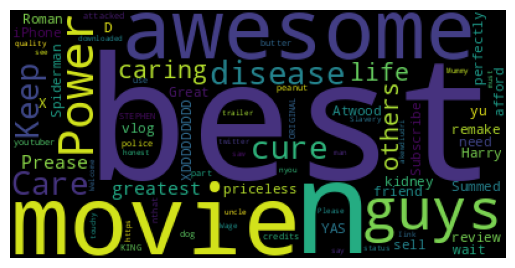

In [32]:
plt.imshow(wordcloud)
plt.axis('off')

In [33]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comment)

(-0.5, 399.5, 199.5, -0.5)

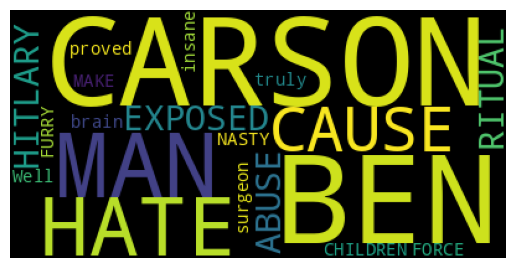

In [34]:
plt.imshow(wordcloud)
plt.axis('off')

# **Emoji Analysis**

In [39]:
emoji.__version__

'2.2.0'

In [40]:
sample_comment_df['comment_text'].head()

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉


In [44]:
comment = 'trending 😉'
emoji_list = []
for char in comment:
  if char in emoji.EMOJI_DATA:
    emoji_list.append(char)
emoji_list

['😉']

In [45]:
# Alternate method using List Comprehension
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [46]:
all_emoji_list = []
for comment in sample_comment_df['comment_text']:
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emoji_list.append(char)
all_emoji_list

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤',
 '😂',
 '❤',
 '💎',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😒',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '😊',
 '❤',
 '👈',
 '😂',
 '😂',
 '👌',
 '👌',
 '🤔',
 '👈',
 '😂',
 '😂',
 '😁',
 '💔',
 '😂',
 '👎',
 '👎',
 '👎',
 '👎',
 '👎',
 '🍎',
 '😤',
 '😂',
 '😂',
 '😂',
 '😂',
 '👈',
 '😭',
 '😭',
 '😭',
 '😢',
 '😢',
 '😢',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '💋',
 '💋',
 '👫',
 '💘',
 '😻',
 '💋',
 '💋',
 '💖',
 '💖',
 '💖',
 '💖'

In [47]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [49]:
Counter(all_emoji_list).most_common(10)

[('😂', 105),
 ('💖', 14),
 ('👏', 10),
 ('😆', 9),
 ('😮', 9),
 ('👈', 8),
 ('😁', 8),
 ('❤', 7),
 ('😍', 7),
 ('🤣', 6)]

In [50]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 105)

In [51]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [52]:
Counter(all_emoji_list).most_common(10)[0][1]

105

In [54]:
top_ten_emoji = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]
top_ten_emoji

['😂', '💖', '👏', '😆', '😮', '👈', '😁', '❤', '😍', '🤣']

In [55]:
top_ten_emoji_frequency = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]
top_ten_emoji_frequency

[105, 14, 10, 9, 9, 8, 8, 7, 7, 6]

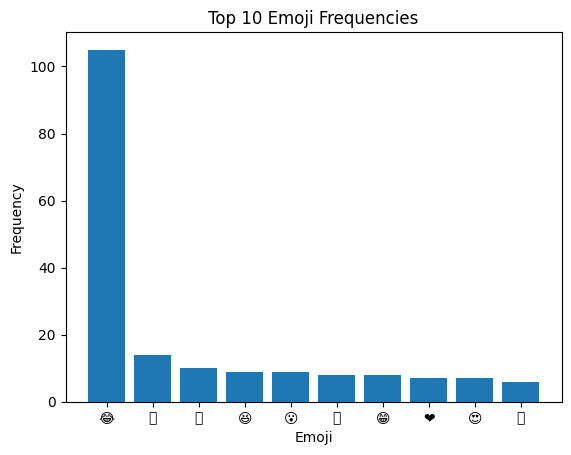

In [59]:
# Create the bar chart
plt.bar(top_ten_emoji, top_ten_emoji_frequency)

# Add labels and title
plt.xlabel("Emoji")
plt.ylabel("Frequency")
plt.title("Top 10 Emoji Frequencies")

# Display the chart
plt.show()

# **Collect Entire Data**

In [79]:
files = os.listdir('/content/drive/My Drive/portfolio_dataset/project_1/additional_data')

In [80]:
files

['MX_category_id.json',
 'IN_category_id.json',
 'CA_category_id.json',
 'FR_category_id.json',
 'DE_category_id.json',
 'GB_category_id.json',
 'JP_category_id.json',
 'KR_category_id.json',
 'RU_category_id.json',
 'US_category_id.json',
 'FRvideos.csv',
 'JPvideos.csv',
 'INvideos.csv',
 'GBvideos.csv',
 'DEvideos.csv',
 'CAvideos.csv',
 'USvideos.csv',
 'RUvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'CAvideos.gsheet']

In [81]:
files_csv = [file for file in files if '.csv' in file]

In [82]:
files_csv

['FRvideos.csv',
 'JPvideos.csv',
 'INvideos.csv',
 'GBvideos.csv',
 'DEvideos.csv',
 'CAvideos.csv',
 'USvideos.csv',
 'RUvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv']

In [83]:
filterwarnings('ignore')

In [86]:
combined_csv_df = pd.DataFrame()
path = '/content/drive/My Drive/portfolio_dataset/project_1/additional_data'

for file in files_csv:
  current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', on_bad_lines='skip')
  combined_csv_df = pd.concat([combined_csv_df, current_df], ignore_index=True)

In [87]:
combined_csv_df.shape

(375942, 16)